<a href="https://colab.research.google.com/github/kimhwijin/HandsOnMachineLearing/blob/main/Sequential_Using_CNN_RNN_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib as mpl

np.random.seed(42)
tf.random.set_seed(42)

# Generate_Sample_Series

In [15]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offset1, offset2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offset1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offset2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[..., np.newaxis].astype(np.float32)


def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$", legend=True):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")

(7000, 50, 1) (7000, 1)


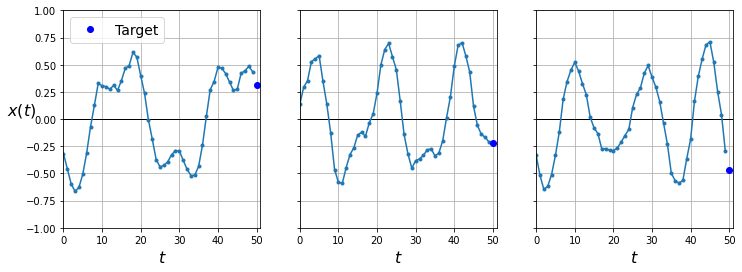

In [17]:
n_steps = 50
series = generate_time_series(10000, n_steps+1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]
print(X_train.shape, y_train.shape)

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None),
                legend=(col == 0))
plt.show()

# BaseLine_Performance

In [25]:
#naive forecasting
y_pred = X_valid[:, -1]
print(np.mean(keras.losses.mean_squared_error(y_valid, y_pred)))

#완전 연결 신경망
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])
model.compile(loss='mse', optimizer="adam")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

0.020025073
Epoch 1/20
219/219 [==============================] - 1s 2ms/step - loss: 0.0888 - val_loss: 0.0291
Epoch 2/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0199 - val_loss: 0.0128
Epoch 3/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0107 - val_loss: 0.0087
Epoch 4/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0072
Epoch 5/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0064
Epoch 6/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0059
Epoch 7/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0056
Epoch 8/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0053
Epoch 9/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0050
Epoch 10/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0050 - val_

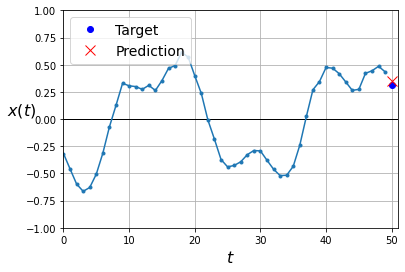

In [27]:
model.evaluate(X_test, y_test)
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

# Simple_RNN_Implement

In [30]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])
optimizer = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss='mse', optimizer=optimizer)
model.summary()
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
219/219 [==============================] - 3s 9ms/step - loss: 0.1505 - val_loss: 0.1474
Epoch 2/20
219/219 [==============================] - 2s 9ms/step - loss: 0.1455 - val_loss: 0.1452
Epoch 3/20
219/219 [==============================] - 2s 9ms/step - loss: 0.1459 - val_loss: 0.1482
Epoch 4/20
219/219 [==============================] - 2s 9ms/step - loss: 0.1349 - val_loss: 0.0822
Epoch 5/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0524 - val_loss: 0.0359
Epoch 6/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0311 - val_l

32/32 [==============================] - 0s 3ms/step - loss: 0.0108


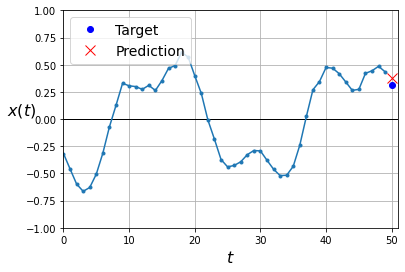

In [31]:
model.evaluate(X_test, y_test)
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

# Deep_RNN

In [32]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 9s 31ms/step - loss: 0.0603 - val_loss: 0.0121
Epoch 2/20
219/219 [==============================] - 6s 29ms/step - loss: 0.0087 - val_loss: 0.0061
Epoch 3/20
219/219 [==============================] - 6s 29ms/step - loss: 0.0055 - val_loss: 0.0048
Epoch 4/20
219/219 [==============================] - 6s 29ms/step - loss: 0.0046 - val_loss: 0.0039
Epoch 5/20
219/219 [==============================] - 6s 29ms/step - loss: 0.0040 - val_loss: 0.0035
Epoch 6/20
219/219 [==============================] - 6s 30ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 7/20
219/219 [==============================] - 6s 29ms/step - loss: 0.0035 - val_loss: 0.0039
Epoch 8/20
219/219 [==============================] - 6s 29ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 9/20
219/219 [==============================] - 6s 29ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 10/20
219/219 [==============================] - 6s 29ms/step - loss: 0.0031 - val_lo

In [34]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, None, 20)          440       
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 20)          820       
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 1)                 22        
                                                                 
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________


32/32 [==============================] - 0s 8ms/step - loss: 0.0030


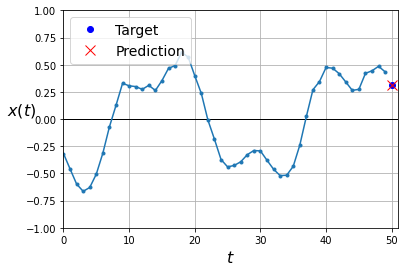

In [33]:
model.evaluate(X_test, y_test)
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [49]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
model.summary()
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_20 (SimpleRNN)   (None, None, 20)          440       
                                                                 
 simple_rnn_21 (SimpleRNN)   (None, 20)                820       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
219/219 [==============================] - 6s 22ms/step - loss: 0.0242 - val_loss: 0.0058
Epoch 2/20
219/219 [==============================] - 4s 21ms/step - loss: 0.0045 - val_loss: 0.0036
Epoch 3/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0035 - val_loss: 0.0037
Epoch 4/20
2

32/32 [==============================] - 0s 6ms/step - loss: 0.0032


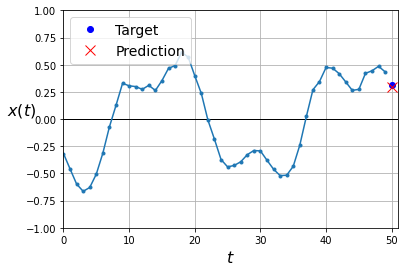

In [50]:
model.evaluate(X_test, y_test)
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

# Multi_Forecasting

In [53]:
np.random.seed(43) # 42는 훈련 세트에 있는 첫 번째 시리즈를 반환하기 때문에 다른 값으로 지정합니다
#순서대로 10개 예측
series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:]

print(Y_pred.shape)

(1, 10, 1)


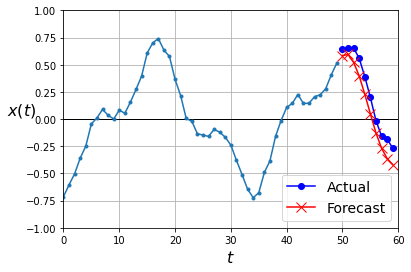

In [56]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "bo-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "rx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [59]:
#한번에 10개 예측
series = generate_time_series(10000, n_steps + 10)
X_train, y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, y_test = series[9000:, n_steps], series[9000:, -10:, 0]
print(X_train.shape, y_train.shape)

(7000, 50, 1) (7000, 10)


In [64]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])
model.compile(loss='mse', optimizer='adam')
history = model.fit(X_train, y_train, epochs=20, validation_data=[X_valid, y_valid])

Epoch 1/20
219/219 [==============================] - 6s 23ms/step - loss: 0.0565 - val_loss: 0.0316
Epoch 2/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0272 - val_loss: 0.0216
Epoch 3/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0198 - val_loss: 0.0223
Epoch 4/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0167 - val_loss: 0.0178
Epoch 5/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0150 - val_loss: 0.0129
Epoch 6/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0131 - val_loss: 0.0117
Epoch 7/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0130 - val_loss: 0.0114
Epoch 8/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0121 - val_loss: 0.0118
Epoch 9/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0116 - val_loss: 0.0106
Epoch 10/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0108 - val_lo

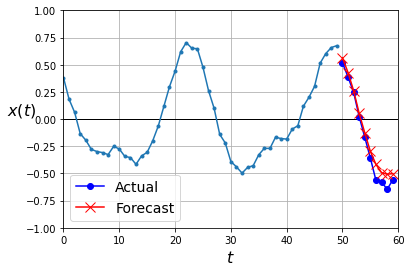

0.006161594

In [71]:
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
Y_pred = model.predict(X_new)[..., np.newaxis]
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

np.mean(keras.metrics.mean_squared_error(Y_new, Y_pred))